## quest
- 입원기간(목표 변수) 영향을 주는 설명변수들 찾기
- 최소 설명변수 갯수 10개, 공통으로 BMI 만들기
- README.md : 설명변수 선택 이유, 분석 인사이트 
- 담당자별 분석한 ipynb(각각 DDA, EDA, CDA)

### DDA 분석 결과 
- 변수 선택 
    - 목적 변수 : '입원기간'
    - 설명변수 선택 : '체중', '연령', '신장', '전방디스크높이(mm)', '후방디스크높이(mm)', '디스크단면적','디스크위치', 'PI', '수술기법'
- 변수 선택 기준 
    - 입원기간에 영향을 끼쳐보이는 변수들을 선택하여 영향여부 및 정도를 확인하고자 함.
    - '연령' : 흔히 저연령층이 회복력이 빨라 입원기간이 짧다고 생각되어지는데 해당 사실이 맞는지 통계적 수치로 확인하고자 함.
    - '체중', '신장' 을 통해 BMI를 추출하여 입원기간에 영향을 미치는지 확인하고자 함.
    - '전방디스크높이(mm)', '후방디스크높이(mm)'가 디스크에 어떤 영향을 미쳐 입원기간에 영향을 끼치는지 확인하고자 함.
    - '디스크단면적','디스크위치': 해당 크기와 위치가 입원기간에 어떤 영향을 끼치는지 확인하고자 함.
    - 'PI': 척추 곡률을 나타내는 지표를 통해 곡률이 클수록 입원기간에 영향을 미치는  정도를 파악하고자 함.
- DDA 분석 결과 
    - 입원기간의 최장기간은 46일, 최단기간은 0일임. 입원기간의 평균값은 1.72일, 중앙값은 1임.
    - 수술기법 중 'TELD'를 사용하면 입원기간이 짧은것으로 확인이 되어지나, 'TELD'를 사용한 수술이 압도적으로 많아 정확한 영향 확인불가로 EDA,CDA를 통해 더 정확히 파악하고자 함. 

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df_ROS = pd.read_csv('../../dataset/RecurrenceOfSurgeryData.csv')
df_ROS[:2]

,Unnamed: 0,입원기간,직업,환자통증정도,통증기간(월),당뇨여부,심혈관질환,암발병여부,체중,연령,신장,전방디스크높이(mm),후방디스크높이(mm),디스크단면적,디스크위치,PI,수술기법
0,0,2,자영업,10,1.0,0,0,0,60.3,66,163,16.1,12.3,2048.5,4,51.6,TELD
1,1,1,운동선수,10,1.0,0,0,0,71.7,47,171,13.7,6.4,1753.1,4,40.8,TELD


In [3]:
df_ROS.columns

Index(['Unnamed: 0', '입원기간', '직업', '환자통증정도', '통증기간(월)', '당뇨여부', '심혈관질환',
       '암발병여부', '체중', '연령', '신장', '전방디스크높이(mm)', '후방디스크높이(mm)', '디스크단면적',
       '디스크위치', 'PI', '수술기법'],
      dtype='object')

In [4]:
df_ROS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1405 non-null   int64  
 1   입원기간         1405 non-null   int64  
 2   직업           1405 non-null   object 
 3   환자통증정도       1405 non-null   int64  
 4   통증기간(월)      1405 non-null   float64
 5   당뇨여부         1405 non-null   int64  
 6   심혈관질환        1405 non-null   int64  
 7   암발병여부        1405 non-null   int64  
 8   체중           1405 non-null   float64
 9   연령           1405 non-null   int64  
 10  신장           1405 non-null   int64  
 11  전방디스크높이(mm)  1405 non-null   float64
 12  후방디스크높이(mm)  1405 non-null   float64
 13  디스크단면적       1405 non-null   float64
 14  디스크위치        1405 non-null   int64  
 15  PI           1405 non-null   float64
 16  수술기법         1405 non-null   object 
dtypes: float64(6), int64(9), object(2)
memory usage: 186.7+ KB


#### 데이터 타입 확인 및 변환 여부 확인 
- 범주형 : '수술기법'
- 연속형 : '체중', '연령', '신장', '전방디스크높이(mm)', '후방디스크높이(mm)', '디스크단면적','디스크위치', 'PI'
  - .value_counts()를 통해 확인결과 범주형으로 전환할 데이터는 없어 보임. 

In [5]:
df_ROS.dtypes #데이터 타입 확인 

Unnamed: 0       int64
입원기간             int64
직업              object
환자통증정도           int64
통증기간(월)        float64
당뇨여부             int64
심혈관질환            int64
암발병여부            int64
체중             float64
연령               int64
신장               int64
전방디스크높이(mm)    float64
후방디스크높이(mm)    float64
디스크단면적         float64
디스크위치            int64
PI             float64
수술기법            object
dtype: object

In [6]:
df_ROS.describe()[:2] # 연속형

,Unnamed: 0,입원기간,환자통증정도,통증기간(월),당뇨여부,심혈관질환,암발병여부,체중,연령,신장,전방디스크높이(mm),후방디스크높이(mm),디스크단면적,디스크위치,PI
count,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000,1405.0000,1405.000000,1405.000000,1405.000000,1405.00000,1405.000000,1405.000000,1405.000000,1405.000000
mean,999.568683,1.720285,6.921708,6.372811,0.053381,0.037011,0.0121,68.250819,40.015658,168.148043,11.36037,8.368192,1987.863423,4.525979,46.519715


In [7]:
df_ROS.describe(include=object)[:2] # 범주형

,직업,수술기법
count,1405,1405
unique,17,2


In [8]:
# df_ROS['체중'].value_counts()
# df_ROS['연령'].value_counts()
# df_ROS['신장'].value_counts()
# df_ROS['전방디스크높이(mm)'].value_counts()
# df_ROS['후방디스크높이(mm)'].value_counts()
# df_ROS['디스크단면적'].value_counts()
# df_ROS['디스크위치'].value_counts()
df_ROS['PI'].value_counts()

## 연속형인 컬럼들은 .value_counts()를 통해 확인해본 결과 범주형으로 데이터 변환해야할 데이터를 없어보임.

41.9    14
46.0    13
37.1    13
51.1    12
49.7    12
        ..
72.0     1
52.5     1
63.8     1
31.2     1
51.8     1
Name: PI, Length: 343, dtype: int64

In [9]:
df_ROS['직업'].value_counts().index

Index(['사무직', '자영업', '무직', '학생', '주부', '군인', '운수업', '공무원', '노동직', '의료직', '사업가',
       '농업', '교사', '특수전문직', '건설업', '운동선수', '예술가'],
      dtype='object')

In [10]:
pd.pivot_table(data= df_ROS, index='입원기간', columns=['체중', '연령', '신장', '전방디스크높이(mm)', '후방디스크높이(mm)', '디스크단면적','디스크위치', 'PI', '수술기법'], aggfunc='size')

체중            35.0    38.0    43.0            44.0                           \
연령               86      32      44      57      21      22      23      37   
신장              140     162     158     158     153     154     153     154   
전방디스크높이(mm)   6.10    9.90    5.80    13.10   7.20    10.00   18.20   10.00   
후방디스크높이(mm)   5.50    9.30    4.70    8.30    4.40    5.70    12.00   9.50    
디스크단면적      1901.06 1590.10 1889.00 2427.34 1170.00 2308.00 2371.00 1612.42   
디스크위치            11      4       4       2       5       4       4       4    
PI             63.4    44.4    42.9    54.6    34.4    49.7    38.6    50.3   
수술기법           TELD    TELD    TELD    TELD    TELD    TELD    TELD    TELD   
입원기간                                                                          
0               NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1               1.0     1.0     1.0     NaN     1.0     1.0     1.0     NaN   
2               NaN     NaN     NaN     NaN     NaN     NaN     NaN     1.0   
3               NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4               NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5               NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
6               NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
7               NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
8               NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
9               NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
11              NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
12              NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
16              NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
17              NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
18              NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
27              NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
44              NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
46              NaN     NaN     NaN     1.0     NaN     NaN     NaN     NaN   

체중            45.0           ...   100.0           103.0           104.0  \
연령               22      30  ...      36      58      30      39      42   
신장              158     158  ...     178     159     177     204     183   
전방디스크높이(mm)   10.50   10.74  ...   14.70   14.10   12.70   15.30   14.10   
후방디스크높이(mm)   9.40    7.96   ...   7.10    8.70    7.80    7.00    8.10    
디스크단면적      1747.20 1855.79  ... 1784.10 1744.80 2056.60 2587.80 2341.60   
디스크위치            4       4   ...      5       4       5       4       5    
PI             64.2    67.4  ...    31.4    42.6    37.1    35.1    48.0   
수술기법           TELD    TELD  ...    TELD    TELD    IELD    TELD    IELD   
입원기간                         ...                                           
0               NaN     NaN  ...     NaN     NaN     NaN     1.0     NaN   
1               1.0     1.0  ...     1.0     1.0     NaN     NaN     NaN   
2               NaN     NaN  ...     NaN     NaN     1.0     NaN     1.0   
3               NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
4               NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
5               NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
6               NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
7               NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
8               NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
9               NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
11              NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
12              NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
16              NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN   
17              NaN     NaN  ...     Na

In [11]:
df_ROS['입원기간'].value_counts()

1     854
2     364
3     125
4      32
5       6
0       3
6       3
11      3
7       3
8       3
17      2
27      1
44      1
46      1
9       1
18      1
16      1
12      1
Name: 입원기간, dtype: int64

In [12]:
#df_ROS['입원기간'].median() # 입원기간의 중앙값 #1.0
#df_ROS['입원기간'].mean() #1.7202846975088968
#df_ROS['입원기간'].min() #0일
df_ROS['입원기간'].max() # 46일

46

In [13]:
median_time = df_ROS['입원기간'].median()   # 입원기간이 중앙값 이상인 데이터 추출 
df_ROS_M = df_ROS[df_ROS['입원기간'] >= median_time]
df_ROS_M[:2]

,Unnamed: 0,입원기간,직업,환자통증정도,통증기간(월),당뇨여부,심혈관질환,암발병여부,체중,연령,신장,전방디스크높이(mm),후방디스크높이(mm),디스크단면적,디스크위치,PI,수술기법
0,0,2,자영업,10,1.0,0,0,0,60.3,66,163,16.1,12.3,2048.5,4,51.6,TELD
1,1,1,운동선수,10,1.0,0,0,0,71.7,47,171,13.7,6.4,1753.1,4,40.8,TELD


In [14]:
pd.pivot_table(data=df_ROS, index='입원기간', columns='수술기법', aggfunc='size')

# 수술기법 중 'TELD'를 사용하면 입원기간이 짧은것으로 확인 

수술기법,IELD,TELD
입원기간,,
0,NaN,3.0
1,57.0,797.0
2,25.0,339.0
3,14.0,111.0
4,4.0,28.0
5,1.0,5.0
6,1.0,2.0
7,NaN,3.0
8,NaN,3.0


### 시각화 확인  
- '체중', '연령', '신장', '전방디스크높이(mm)', '후방디스크높이(mm)', '디스크단면적','디스크위치', 'PI', '수술기법'

- 수술기법 : 'TELD'기법을 압도적으로 많이 사용했음을 확인함. 해당 기법을 사용하면 입원기간이 짧아지는지의 여부를 확인할 필요가 있음
- 그 외 다른 연속형 데이터들을 해당그래프를 통해 입원기간에 미치는 영향을 파악하기에는 미비함. 더 자세한 분석을 통해 입원기간에 미치는 영향을 확인해봐야 함.

In [30]:
df_ROS_GB = df_ROS[['입원기간','체중', '연령', '신장', '전방디스크높이(mm)', '후방디스크높이(mm)', '디스크단면적','디스크위치', 'PI','수술기법']]
continous_list = df_ROS_GB.describe().columns
continous_list

Index(['입원기간', '체중', '연령', '신장', '전방디스크높이(mm)', '후방디스크높이(mm)', '디스크단면적',
       '디스크위치', 'PI'],
      dtype='object')

In [38]:
df_ROS['입원기간'].value_counts()

1     854
2     364
3     125
4      32
5       6
0       3
6       3
11      3
7       3
8       3
17      2
27      1
44      1
46      1
9       1
18      1
16      1
12      1
Name: 입원기간, dtype: int64

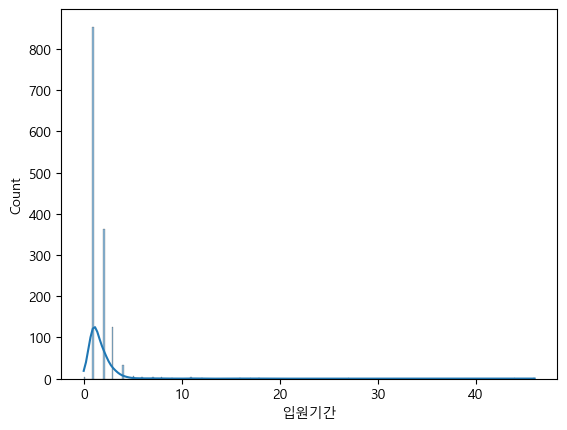

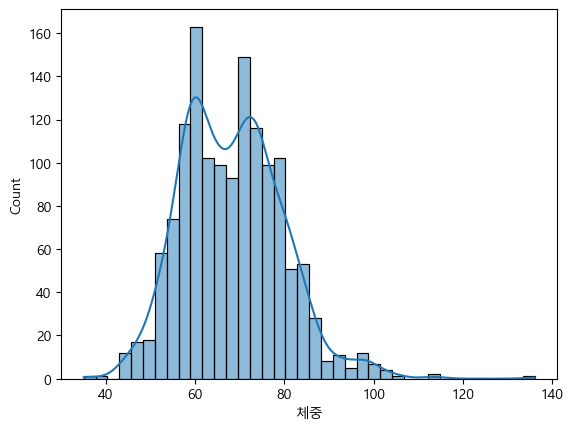

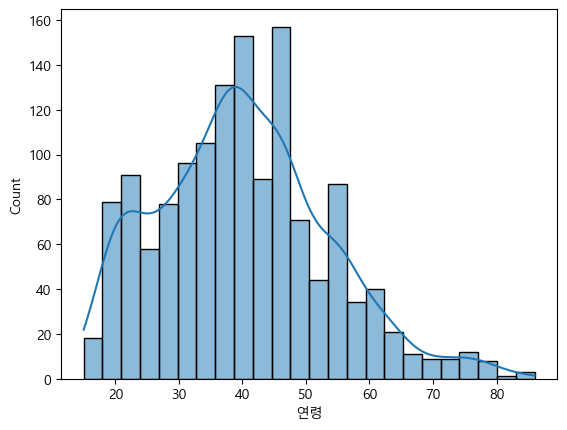

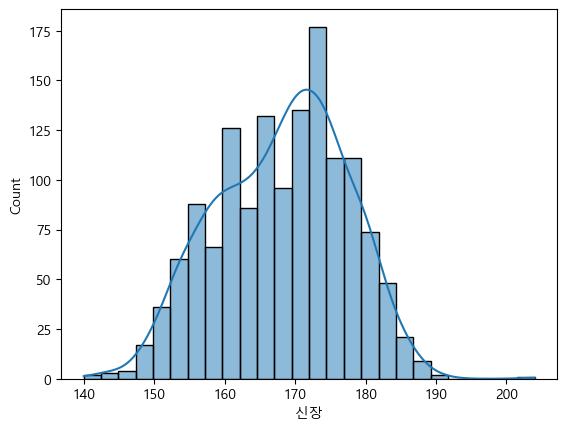

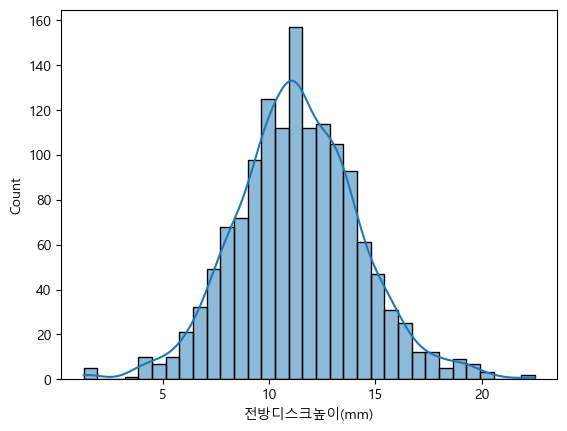

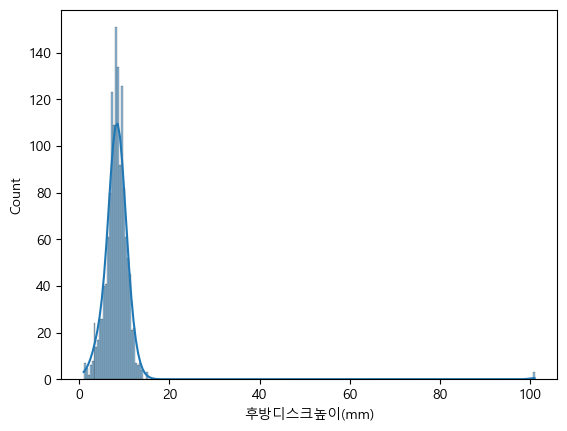

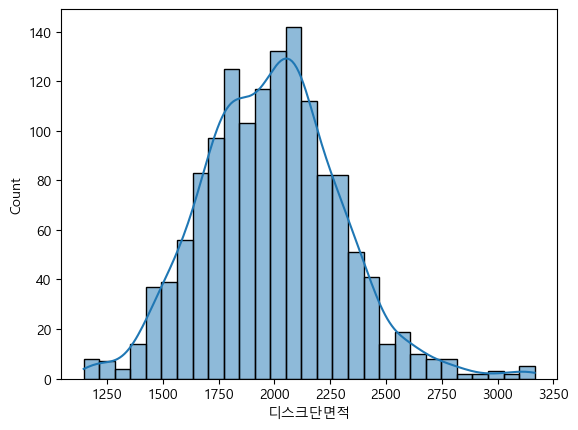

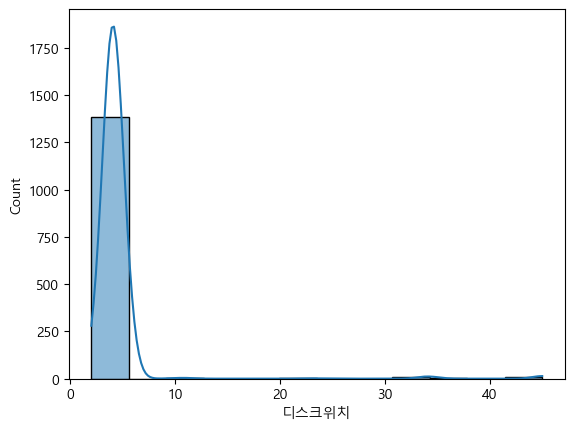

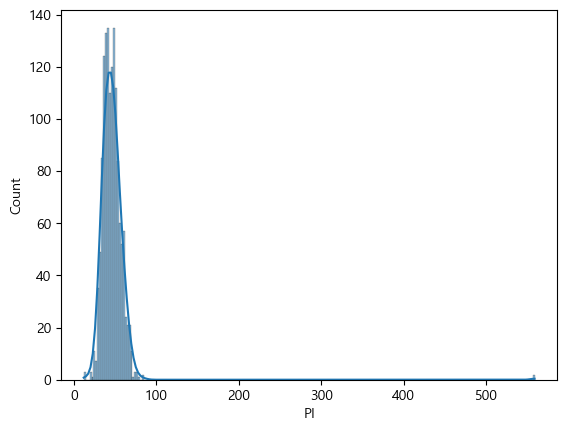

In [37]:
## for문을 사용해서 histplot 그래프 

for  continous in continous_list : 
    sns.histplot(data=df_ROS_GB, x=continous, kde=True) # 연속형 histplot그래프 사용  #hue='입원기간'
    plt.show()

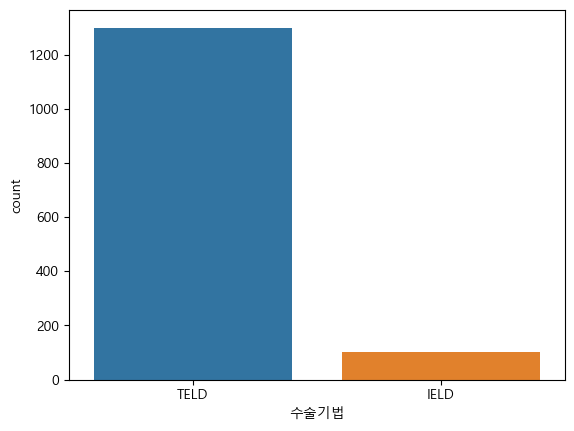

In [33]:
sns.countplot(data=df_ROS, x='수술기법')
plt.show()